In [44]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

data = pandas.read_csv("bodyPerformance.csv")
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [45]:
import numpy

y = data["class"]

categorical_columns = ["gender"]
numeric_columns = ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce"]
numeric_data = data[numeric_columns].to_numpy()

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

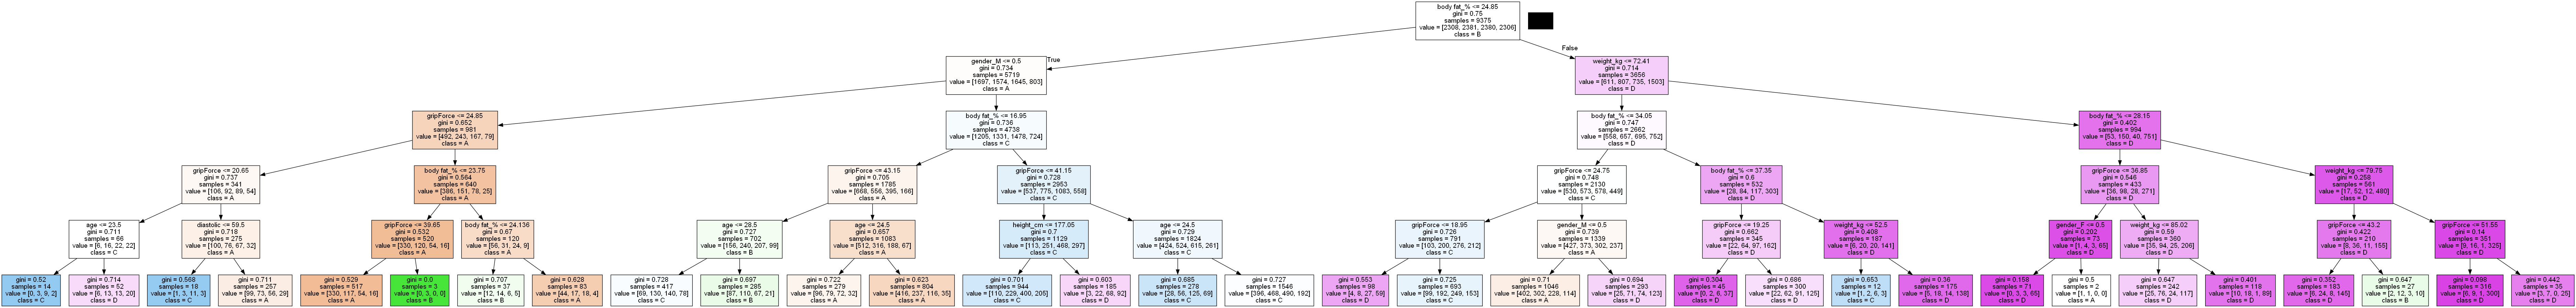

In [47]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=list(encoder.get_feature_names_out()) + numeric_columns, class_names=["A", "B", "C", "D"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

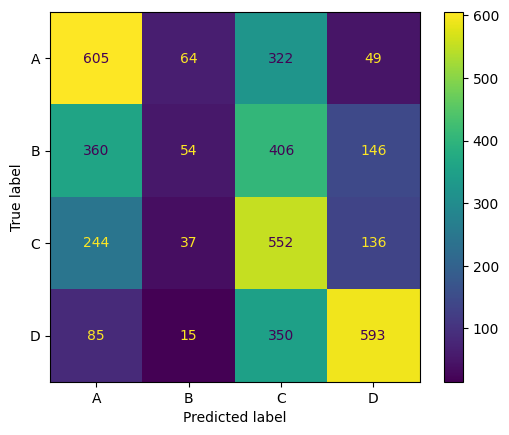

In [48]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [49]:
accuracy_score(y_test, y_pred)

0.4489795918367347

In [53]:
import numpy

y = data["class"]
categorical_columns = ["gender"]
numeric_columns = ["age", "height_cm", "weight_kg", "body fat_%", "diastolic", "systolic", "gripForce"]

scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.41040318566450973